## The Discrete Voter Model on Case Studies

This notebook evaluates the Discrete Voter Model on real elections from North Carolina and Chicago, the case studies.

In [1]:
import pandas as pd
import pickle
from tqdm.autonotebook import trange, tqdm

/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
import dvm
import dvm_eval
import dvm_plot
import elect
import importlib
import tools

## Chicago

### Import data and create election objects

In [3]:
chi_mayor_2011 = pd.read_csv('electoral_data/chi_mayor_2011.csv')

In [4]:
chi_demo = pd.read_csv('electoral_data/chicago_demo.csv')

In [5]:
chi_mayor_2015 = pd.read_csv('electoral_data/chi_mayor_2015.csv')

In [6]:
chi_mayor_2019 = pd.read_csv('electoral_data/chi_mayor_2019.csv')

### Run the DVM on the data

#### Clip to two candidates and the three dominant races

In [7]:
chi_demo_clip = chi_demo.drop(['asian', 'other'], axis=1)

In [8]:
chi_mayor_2015_clip = chi_mayor_2015[['prec_id', 'Emanuel', 'Garcia']]

In [9]:
chi_mayor_2019_clip = chi_mayor_2019[['prec_id', 'Lightfoot', 'Preckwinkle']]

#### Separate by ward, instead of precinct

##### 2015

In [10]:
chi_mayor_2015_clip['ward_id'] = chi_mayor_2015_clip['prec_id'].str[:3].str.replace('C', 'W')

/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
chi_mayor_2015_ward = chi_mayor_2015_clip.groupby('ward_id').agg('sum')

In [12]:
chi_demo_clip['ward_id'] = chi_demo_clip['prec_id'].str[:3].str.replace('C', 'W')

In [13]:
chi_demo_ward = chi_demo_clip.groupby('ward_id').agg('sum')

##### 2019

In [14]:
chi_mayor_2019_clip['ward_id'] = chi_mayor_2019_clip['prec_id'].str[:3].str.replace('C', 'W')

/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
chi_mayor_2019_ward = chi_mayor_2019_clip.groupby('ward_id').agg('sum')

#### Create elections

In [16]:
cm_2015_ward = elect.create_elections(chi_mayor_2015_ward, chi_demo_ward, "chi_mayor_2015_by_ward", id='ward_id')

In [17]:
cm_2015_ward_results = dvm.dvm_elections(cm_2015_ward, expec_scoring=True, n_steps=10000, verbose=True)

The Random Walk Metropolis chain will be run in 1000 chunks of size 10, with 0 steps at the end.

[1/3] Running the chain on 1000 chunks of 10 iterations each...



[2/3] Running the chain for 0 more steps...
[3/3] Burning 0.3 of the sample...
Done.
Generated a sample of 7000 observations in ~36729 seconds.


In [18]:
cm_2019_ward = elect.create_elections(chi_mayor_2019_ward, chi_demo_ward, "chi_mayor_2019_by_ward", id='ward_id')

In [19]:
cm_2019_ward_results = dvm.dvm_elections(cm_2019_ward, expec_scoring=True, n_steps=10000, verbose=True)

The Random Walk Metropolis chain will be run in 1000 chunks of size 10, with 0 steps at the end.

[1/3] Running the chain on 1000 chunks of 10 iterations each...



[2/3] Running the chain for 0 more steps...
[3/3] Burning 0.3 of the sample...
Done.
Generated a sample of 7000 observations in ~37427 seconds.


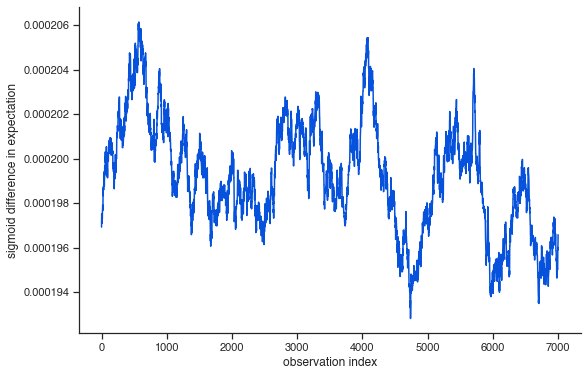

In [20]:
dvm_plot.trace_plot(cm_2015_ward_results['chain_results'])

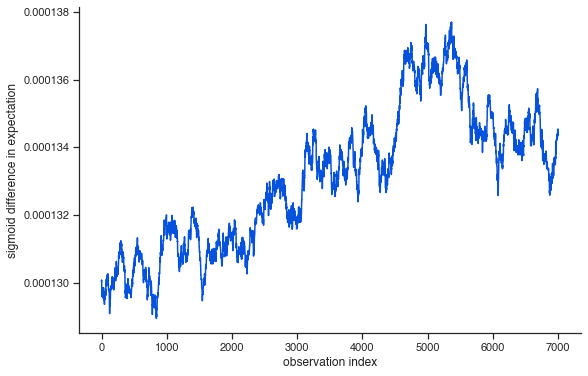

In [21]:
dvm_plot.trace_plot(cm_2019_ward_results['chain_results'])

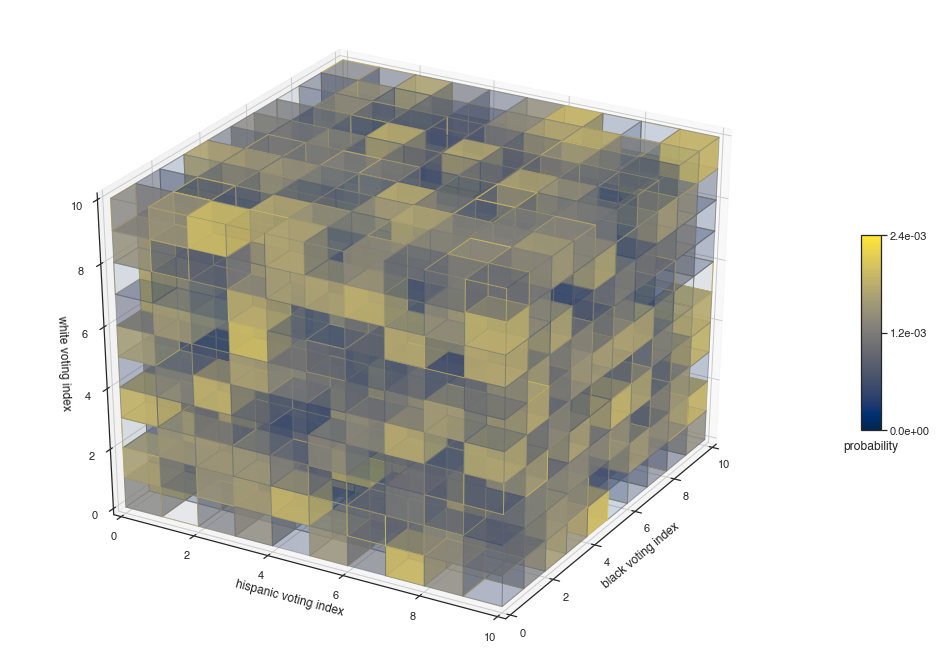

In [35]:
# Chicago 2015 Mayor mean PHC plot
dvm_plot.phc_plot_3d(dvm.mean_phc(cm_2015_ward_results['chain_results']), cm_2015_ward.dpp['W01'])

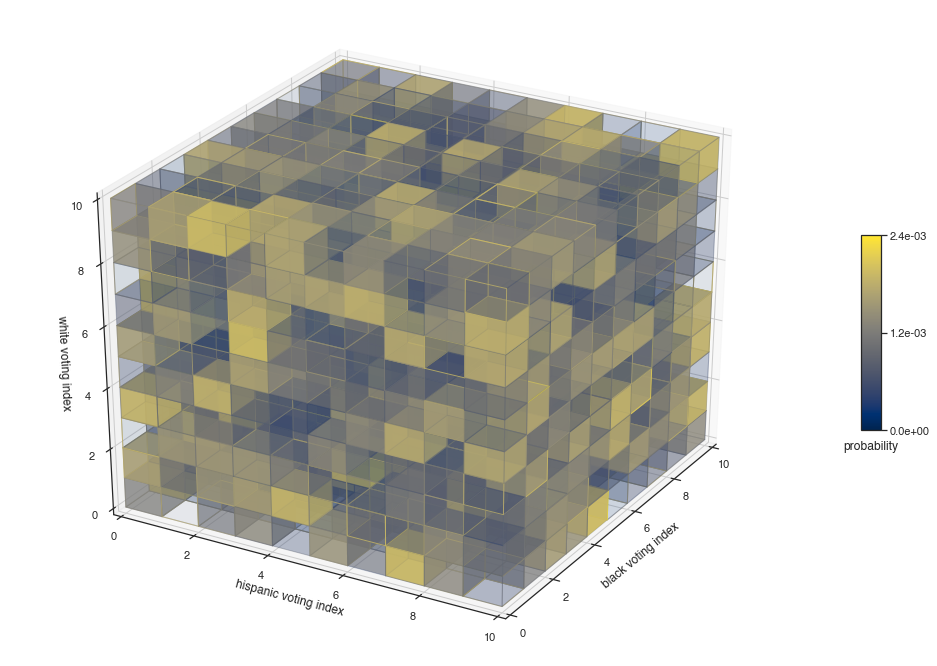

In [36]:
# Chicago 2015 Mayor MLE plot
dvm_plot.phc_plot_3d(dvm.chain_mle(cm_2015_ward_results['chain_results'])[0], cm_2015_ward.dpp['W01'])

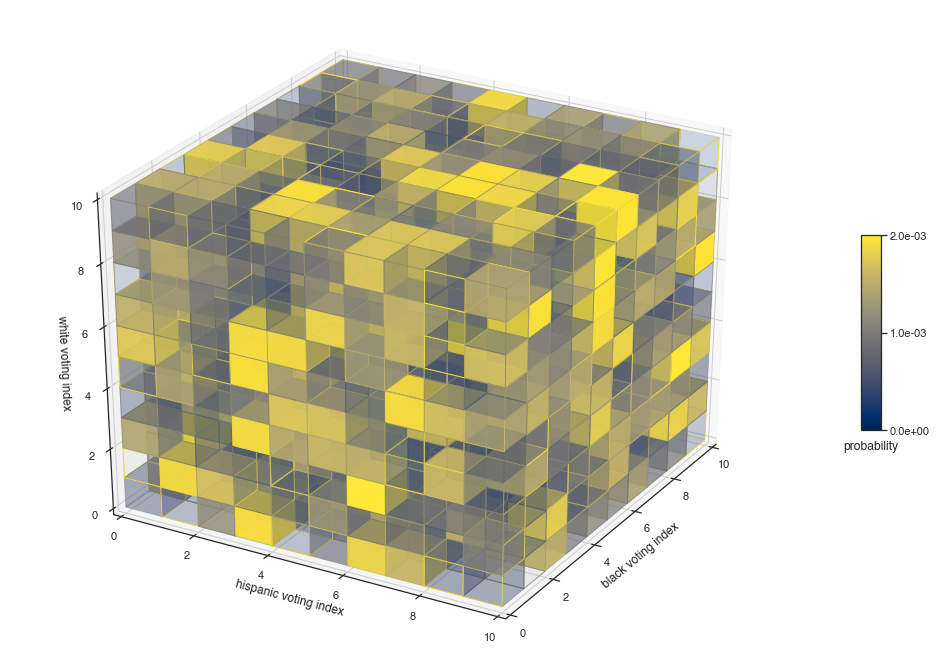

In [137]:
# Chicago 2019 Mayor MLE plot
dvm_plot.phc_plot_3d(dvm.chain_mle(cm_2019_ward_results['chain_results'])[0], cm_2019_ward.dpp['W01'])

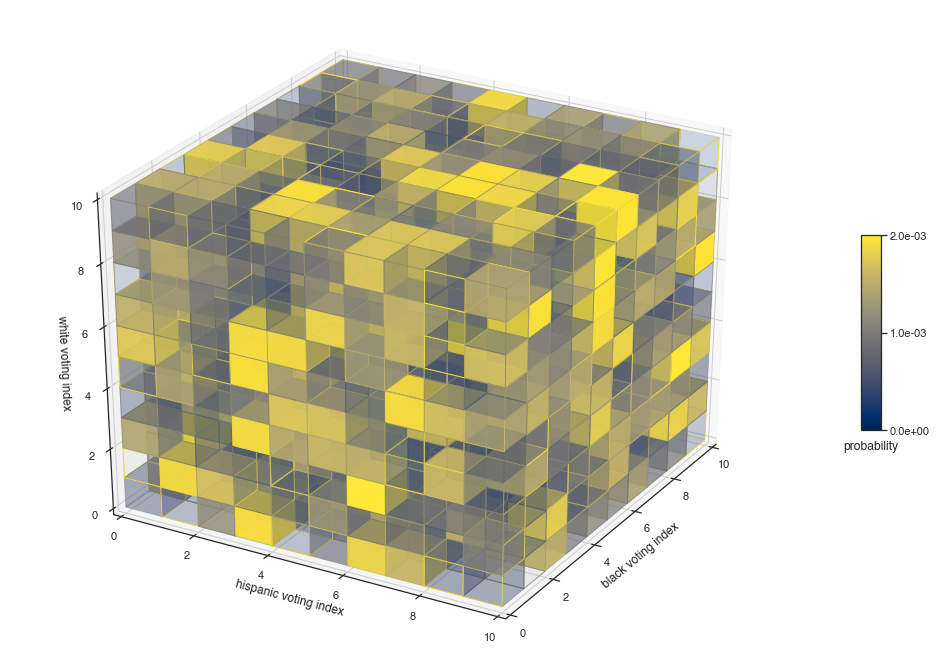

In [137]:
# Chicago 2019 Mayor mean PHC plot
dvm_plot.phc_plot_3d(dvm.mean_phc(cm_2019_ward_results['chain_results']), cm_2019_ward.dpp['W01'])

In [188]:
# with open('pickles/cm_2015_ward_results.pickle', 'wb') as f:
#     pickle.dump(cm_2015_ward_results, f)

In [189]:
# with open('pickles/cm_2019_ward_results.pickle', 'wb') as f:
#     pickle.dump(cm_2019_ward_results, f)

___

In [18]:
clip_chi_mayor_2019 = elect.create_elections(chi_mayor_2019_clip, chi_demo_clip, "chi_mayor_2019")

In [19]:
clip_chi_mayor_2015

A real election with 2 candidates in a district with 2069 precincts and 3 demographic groups.

In [26]:
import importlib
import expec_votes

In [29]:
clip_chi_mayor_2015

A real election with 2 candidates in a district with 2069 precincts and 3 demographic groups.

In [30]:
clip_chi_mayor_2015.candidates

['Emanuel', 'Garcia']

In [32]:
cand_obs_votes = {}
for prec in clip_chi_mayor_2015.precincts:
    cand_obs_votes[prec] = clip_chi_mayor_2015.vote_totals[prec]['Emanuel']

In [35]:
import phc

In [38]:
initial_phc = phc.make_phc(clip_chi_mayor_2015.num_demo_groups, 10)

In [46]:
test_demo_adv = {'C100': {'Black': 10, 'white': 8, 'Latinx': 5},
                 'C200': {'Black': 5, 'white': 8, 'Latinx': 15}}
test_observed_adv = {'C100': 10,
                     'C200': 2}

In [62]:
chain_results = dvm.rwm(20, 0.3, initial_phc,
                        clip_chi_mayor_2015.dpp, cand_obs_votes,
                        expec_scoring=True,
                        verbose=True)

The Random Walk Metropolis chain will be run in 2 chunks of size 10, with 0 steps at the end.

[1/3] Running the chain on 2 chunks of 10 iterations each...


Exception ignored in: <function _EagerDefinedFunctionDeleter.__del__ at 0x12eea8cb0>
Traceback (most recent call last):
  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/eager/function.py", line 389, in __del__
    context.remove_function(self.name)
  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/eager/context.py", line 2029, in remove_function
    context().remove_function(name)
  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/eager/context.py", line 1020, in remove_function
    pywrap_tensorflow.TFE_ContextRemoveFunction(self._handle, name)
KeyboardInterrupt: 


KeyboardInterrupt: 

In [57]:
chain_results = dvm.rwm(20, 0.3, initial_phc,
                        test_demo_adv, test_observed_adv,
                        expec_scoring=True,
                        verbose=True)

The Random Walk Metropolis chain will be run in 2 chunks of size 10, with 0 steps at the end.

[1/3] Running the chain on 2 chunks of 10 iterations each...



[2/3] Running the chain for 0 more steps...
[3/3] Burning 0.3 of the sample...
Done.
Generated a sample of 14 observations in ~3 seconds.


In [28]:
test = dvm.dvm_elections(clip_chi_mayor_2015, expec_scoring=True, n_steps=100, verbose=True)

The Random Walk Metropolis chain will be run in 10 chunks of size 10, with 0 steps at the end.

[1/3] Running the chain on 10 chunks of 10 iterations each...


ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/ops/control_flow_ops.py", line 2757, in while_loop
    return result  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/ops/control_flow_ops.py", line 2705, in <lambda>
    body = lambda i, lv: (i + 1, orig_body(*lv))  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/ops/map_fn.py", line 261, in compute
    return (i + 1, tas)  File "/Users/hakeemangulu/.local/share/virtualenvs/code-9G5VMzgS/lib/python3.7/site-packages/tensorflow_core/python/ops/map_fn.py", line 260, in <listcomp>
    tas = [ta.write(i, val

KeyboardInterrupt: 

#### Mayor 2015

In [33]:
c_mayor_2015_results = dvm.dvm_elections(clip_chi_mayor_2015, expec_scoring=True, n_steps=10000)

In [34]:
c_mayor_2019_results = dvm.dvm_elections(clip_chi_mayor_2019, expec_scoring=True, n_steps=100000)

In [235]:
chi_mayor_2011_mle = dvm.chain_mle(full_chi_mayor_2011_results[0]['chain_results'])[0]

In [224]:
chi_mayor_2011_mean_phc = dvm.mean_phc(full_chi_mayor_2011_results[0]['chain_results'])

In [239]:
chi_mayor_2011_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2011_mle), 
                                               10, 
                                               full_chi_mayor_2011[0].demo)

___

In [14]:
full_chi_mayor_2011_results = dvm.dvm_elections(full_chi_mayor_2011, expec_scoring=True, n_steps=1000)

KeyboardInterrupt: 

In [235]:
chi_mayor_2011_mle = dvm.chain_mle(full_chi_mayor_2011_results[0]['chain_results'])[0]

In [224]:
chi_mayor_2011_mean_phc = dvm.mean_phc(full_chi_mayor_2011_results[0]['chain_results'])

In [239]:
chi_mayor_2011_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2011_mle), 
                                               10, 
                                               full_chi_mayor_2011[0].demo)

In [244]:
full_chi_mayor_2011[0].candidates

['Emanuel', 'DelValle', 'Braun', 'Chico', 'Watkins', 'Walls']

In [240]:
chi_mayor_2011_vpcts_mle

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.85>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.45>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.35>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>}

In [250]:
full_chi_mayor_2011_results = dvm.dvm_elections(full_chi_mayor_2011, candidate='DelValle', expec_scoring=True, n_steps=1000)

In [251]:
chi_mayor_2011_mle = dvm.chain_mle(full_chi_mayor_2011_results[0]['chain_results'])[0]

In [252]:
chi_mayor_2011_mean_phc = dvm.mean_phc(full_chi_mayor_2011_results[0]['chain_results'])

In [253]:
chi_mayor_2011_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2011_mle), 
                                               10, 
                                               full_chi_mayor_2011[0].demo)

In [239]:
chi_mayor_2011_vpcts_mean = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2011_mean_phc), 
                                                10, 
                                                full_chi_mayor_2011[0].demo)

In [254]:
chi_mayor_2011_vpcts_mle

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.05>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.35>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.25>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.85>}

In [240]:
chi_mayor_2011_vpcts_mean

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.85>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.45>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.35>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>}

#### Mayor 2015

In [205]:
full_chi_mayor_2015_results = dvm.dvm_elections(full_chi_mayor_2015, expec_scoring=True, n_steps=1000)

In [236]:
chi_mayor_2015_mle = dvm.chain_mle(full_chi_mayor_2015_results[0]['chain_results'])[0]

In [226]:
chi_mayor_2015_mean_phc = dvm.mean_phc(full_chi_mayor_2015_results[0]['chain_results'])

In [243]:
full_chi_mayor_2015[0].candidates

['Emanuel', 'Wilson', 'Fioretti', 'Garcia', 'Walls']

In [242]:
chi_mayor_2015_vpcts_mle

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.65>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.65>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.75>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.35>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.35>}

In [255]:
full_chi_mayor_2015_results = dvm.dvm_elections(full_chi_mayor_2015, candidate='Wilson', expec_scoring=True, n_steps=1000)

In [256]:
chi_mayor_2015_mle = dvm.chain_mle(full_chi_mayor_2015_results[0]['chain_results'])[0]

In [257]:
chi_mayor_2015_mean_phc = dvm.mean_phc(full_chi_mayor_2015_results[0]['chain_results'])

In [258]:
chi_mayor_2015_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2015_mle), 
                                               10, 
                                               full_chi_mayor_2011[0].demo)

In [258]:
chi_mayor_2015_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2015_mle), 
                                               10, 
                                               full_chi_mayor_2011[0].demo)

In [260]:
chi_mayor_2015_vpcts_mle

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.95>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.45>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.85>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.55>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.15>}

#### Mayor 2019

In [206]:
full_chi_mayor_2019_results = dvm.dvm_elections(full_chi_mayor_2019, expec_scoring=True, n_steps=1000)

In [237]:
chi_mayor_2019_mle = dvm.chain_mle(full_chi_mayor_2019_results[0]['chain_results'])[0]

In [228]:
chi_mayor_2019_mean_phc = dvm.mean_phc(full_chi_mayor_2019_results[0]['chain_results'])

In [241]:
chi_mayor_2015_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2015_mle), 
                                               10, 
                                               full_chi_mayor_2015[0].demo)

In [245]:
chi_mayor_2019_vpcts_mle = elect.get_vote_pcts(tools.get_most_probable_cell(chi_mayor_2019_mle), 
                                               10, 
                                               full_chi_mayor_2019[0].demo)

In [246]:
full_chi_mayor_2019[0].candidates

['Joyce',
 'Vallas',
 'Wilson',
 'Preckwinkle',
 'Daley',
 'Mccarthy',
 'Chico',
 'Mendoza',
 'Enyia',
 'Ford',
 'Salesgriffin',
 'Lightfoot',
 'Fioretti',
 'Kozlar']

In [247]:
chi_mayor_2019_vpcts_mle

{'black': <tf.Tensor: shape=(), dtype=float32, numpy=0.95>,
 'hispanic': <tf.Tensor: shape=(), dtype=float32, numpy=0.95>,
 'asian': <tf.Tensor: shape=(), dtype=float32, numpy=0.25>,
 'white': <tf.Tensor: shape=(), dtype=float32, numpy=0.55>,
 'other': <tf.Tensor: shape=(), dtype=float32, numpy=0.65>}